# Numerical Integration

Do problems 4.1

In [1]:
import scipy as scipy
import numpy as np

import scipy.integrate as integrate
import scipy.special as special
from scipy import stats

from matplotlib import pyplot as plt

from scipy import optimize
from scipy.optimize import fsolve
from scipy import integrate

# FUNCTIONS 
g = lambda x:  0.1*x**4 -1.5*x**3 + 0.53*x**2 + 2*x + 1


# Problem 2.1 

**Exercise 2.1.** You can verify that the analytical solution to the integral of the function
\begin{equation*}
  g(x)=0.1x^4 -1.5x^3 + 0.53x^2 + 2x + 1
\end{equation*}
between $x=-10$ and $x=10$ is $\int_{-10}^{10} g(x)dx = 4,373.3\bar{3}$. Write a Python function that will take as arguments an anonymous function that the user specifies representing $g(x)$, integration bounds $a$ and $b$, the number of intervals $N$, and
```python
method = {'midpoint', 'trapezoid', 'Simpsons'}
```
Using the composite methods, evaluate the numerical approximations of the integral $\int_a^b g(x)dx$ using all three Newton-Cotes methods in your function and compare the difference between the values of these integrals to the true analytical value of the integral.

***Midpoint Rule***
\begin{equation}\label{NumInt_EqMidPtRuleComp}
  \int_a^b g(x)dx \approx \frac{b-a}{N}\sum_{i=0}^{N-1}g(x_i)
\end{equation}

***Trapezoid***

\begin{equation}\label{NumInt_EqTrapRuleComp}
  \int_a^b g(x)dx \approx \frac{b-a}{2N}\left[g(x_0) + 2\sum_{i=1}^{N-1}g(x_i) + g(x_N)\right]
\end{equation}

***Simpson's Rule***
\begin{equation}\label{NumInt_EqTrapRuleComp2}
  \int_a^b g(x)dx \approx \frac{b-a}{6N}\left[g(x_0) + 4\sum_{i=1,3,\ldots}^{2N-1}g(x_i) + 2\sum_{i=2,4,\ldots}^{2N-2}g(x_i) + g(x_{2N})\right]
\end{equation}

In [2]:
def my_int(g,a,b,N,method):
    if method == 'midpoint':
        x = np.linspace(a,b,N+1)
        g_eval = g(x)
        intgrl = (b-a)/N * sum(g_eval)        
    elif method == 'trapezoid':
        x = np.linspace(a,b,N+1)
        g_eval = g(x)
        intgrl = (b-a)/(2*N)*(g_eval[0]+2*sum(g_eval[1:N-1])+g_eval[N]) 
    elif method == 'Simpsons':
        x = np.linspace(a,b,2*(N+1))
        g_eval = g(x)
        range1 = np.arange(1,2*(N)+1,2)
        range2 = np.arange(2,2*N-2+1,2)        
        intgrl = (b-a)/(6*N)*(g_eval[0]+4*sum(g_eval[range1]) + 2*sum(g_eval[range2]) \
                              + g_eval[2*N])
    else:
        print('Pick midpoint, trapezoid, or Simpsons')
    return intgrl



In [3]:
methods = {'midpoint', 'trapezoid', 'Simpsons'}

for jj, method in enumerate(methods):
    int_eval = my_int(g,-10,10,100,method)
    print(method + ' = ' + str(round(int_eval,2)))
print('true value = 4373.33')

Simpsons = 4437.61
midpoint = 4586.87
trapezoid = 4459.65
true value = 4373.33


**Exercise 2.2.** Write a Python function that makes a Newton-Cotes discrete approximation of the distribution of the normally distributed variable $Z \sim N(\mu,\sigma)$. 

Let this function take as arguments the mean $\mu$, the standard deviation $\sigma$, the number of equally spaced nodes $N$ to estimate the distribution, and the number of standard deviations $k$ away from $\mu$ to make the furthest nodes on either side of $\mu$. 

Use the [`scipy.stats.norm.cdf`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) command for the cdf of the normal distribution to compute the weights $\omega_n$ for the nodes $x_n$. 

Have this function return a vector of nodes of $[Z_1,Z_2,...Z_N]$ and a vector of weights $[\omega_1,\omega_2,...\omega_N]$ such that $\omega_i$ is given by the integral under the normal distribution between the midpoints of the two closest nodes. 

Define $f(Z;\mu,\sigma)$ as the pdf of the normal distribution and $F(Z;\mu,\sigma)$ as the cdf.
\begin{equation*}
  \begin{split}
    &\omega_i =
      \begin{cases}
        F\left(\frac{Z_1 + Z_2}{2};\mu,\sigma\right) \quad\quad\quad\quad\:\text{if}\quad i = 1 \\
        \int_{Z_{min}}^{Z_{max}}f(Z;\mu,\sigma)dZ \quad\quad\:\:\text{if}\quad 1<i<N \\
        1 - F\left(\frac{Z_{N-1} + Z_{N}}{2};\mu,\sigma\right) \quad\text{if}\quad i = N
      \end{cases} \\
    &\text{where}\quad Z_{min} = \frac{Z_{i-1} + Z_{i}}{2} \quad\text{and}\quad Z_{max} = \frac{Z_{i} + Z_{i+1}}{2}
  \end{split}
\end{equation*}
What are the weights and nodes $\{\omega_n,Z_n\}_{n=1}^N$ for $N=11$?


In [4]:
def nc_quad_norm(mu,sigma, k, N):
    z = np.linspace(mu-k*sigma,mu+k*sigma,N)
    w_eval = np.zeros_like(z) 
    F = lambda x: stats.norm.cdf(x, loc=mu, scale=sigma)
    N_r = N-1

    for i in range(N_r):
        if i == 0:
            w_eval[i]= F((z[i]+z[i+1])/2)
        elif i == N_r:
            w_eval[i]= 1 - F((z[N_r]+z[N_r-1])/2)
        else:
            z_min = (z[i-1]+z[i])/2
            z_max = (z[i] + z[i+1])/2
            w_eval[i] = F(z_max)- F(z_min)
            # print(w_eval[i] )
    return w_eval, z


weights [0.00346697 0.01439745 0.04894278 0.11725292 0.19802845 0.23582284
 0.19802845 0.11725292 0.04894278 0.01439745 0.        ]


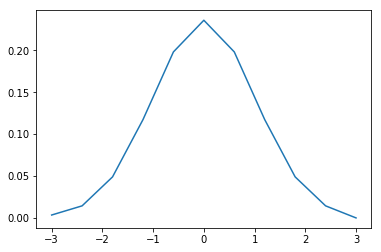

In [5]:
mu = 0
sigma = 1
k = 3
N = 11

w_eval, z = nc_quad_norm(mu,sigma, k, N)

plt.figure()
plt.plot(z,w_eval)
print('weights', w_eval)

**Exercise 2.3.** If $Z\sim N(\mu,\sigma)$, then $A\equiv e^Z\sim LN(\mu,\sigma)$ is distributed lognormally and $\log(A)\sim N(\mu,\sigma)$. Use your knowledge that $A\equiv e^Z$, $\log(A)\sim N(\mu,\sigma)$, and your function from Exercise 2.2 to write a function that gives a discrete approximation to the lognormal distribution. Note: You will not end up with evenly spaced nodes $[A_1,A_2,...A_N]$, but your weights should be the same as in Exercise 2.2.

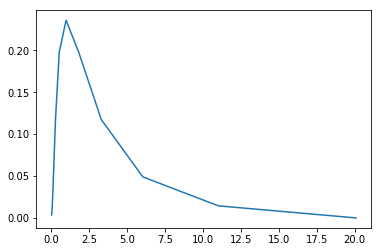

In [6]:
def nc_quad_lognorm(mu,sigma, k, N):
    w_eval, z = nc_quad_norm(mu,sigma, k, N)
    return w_eval, np.exp(z)

mu = 0
sigma = 1
k = 3
N = 11

w_eval, z = nc_quad_lognorm(mu,sigma, k, N)

plt.figure()
plt.plot(z,w_eval)


**Exercise 2.4.** Let $Y_i$ represent the income of individual $i$ in the United States for all individuals $i$. Assume that income $Y_i$ is lognormally distributed in the U.S. according to $Y_i\sim LN(\mu,\sigma)$, where the mean of log income is $\mu = 10.5$ and the standard deviation of log income is $\sigma = 0.8$. Use your function from Exercise 2.3 to compute an approximation of the expected value of income or average income in the U.S. How does your approximation compare to the exact expected value of $E[Y] = e^{\mu + \frac{\sigma^2}{2}}$?

In [7]:
mu = 10.5
sigma = 0.8
k = 5
N = 50

w_eval, z = nc_quad_lognorm(mu,sigma, k, N)

expectation = np.dot(w_eval, z)

print('approximation = ', round(expectation,2))
print('theoretical', round(np.exp(mu+(sigma**2)/2),2))  

approximation =  50065.59
theoretical 50011.09


## 3. Gaussian Quadrature

**Exercise 3.1.** Approximate the integral of the function in Exercise 2.1 using Gaussian quadrature with $N=3$, $(\omega_1,\omega_2,\omega_3,x_1,x_2,x_3)$. Use the class of polynomials $h_i(x)=x^i$. How does the accuracy of your approximated integral compare to the approximations from Exercise 2.1 and the true known value of the integral?

In [8]:
def gaus_quad_eqs(variable):
    w1,x1,w2,x2,w3,x3 = variable
    a = -10
    b = 10
    eqs = np.zeros(6)
    for i in range(6):
        eqs[i]= w1*x1**i+w2*x2**i+w3*x3**i - ((b**(i+1))/(i+1)-(a**(i+1))/(i+1))
    return eqs


#gaus_quad_eqs_current = lambda w1,x1,w2,x2,w3,x3: gaus_quad_eqs(w1,x1,w2,x2,w3,x3,a,b)
[w1,x1,w2,x2,w3,x3] = fsolve(gaus_quad_eqs,(.1,.1,.1,.1,.1,.1))

int = w1*g(x1)+w2*g(x2)+w3*g(x3)
print('My Gaussian Quad',round(int,2))
print('true value = 4373.33')

My Gaussian Quad 4373.33
true value = 4373.33


**Exercise 3.2.** Use the Python Gaussian quadrature command [`scipy.integrate.quad`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) to numerically approximate the integral from Exercise 2.1.
\begin{equation*}
  \int_{-10}^{10} g(x)dx \quad\text{where}\quad g(x)=0.1x^4 -1.5x^3 + 0.53x^2 + 2x + 1
\end{equation*}
How does the approximated integral using the [`scipy.integrate.quad`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) command compare to the exact value of the function?

In [9]:
a = -10
b = 10
int = integrate.quad(g,a,b)
print('scipi Gaussian Quad', int[0])
print('true value = 4373.33')

scipi Gaussian Quad 4373.333333333334
true value = 4373.33


## 4. Monte Carlo Integration

**Exercise 4.1.** Use Monte Carlo integration to approximate the value of $\pi$. 

Define a function in that takes as arguments a function $g(\mathbf{x})$ of a vector of variables $\mathbf{x}$, the domain $\Omega$ of $\mathbf{x}$, and the number of random draws $N$ and returns the Monte Carlo approximation of the integral $\int_\Omega g(\mathbf{x}) d\mathbf{x}$. 

Let $\Omega$ be a generalized rectangle--width $x$ and height $y$. In order to approximate $\pi$, let the functional form of the anonymous function be $g(x,y)$ from Section 4.1 with domain $\Omega = [-1,1]\times[-1,1]$. 

What is the smallest number of random draws $N$ from $\Omega$ that matches the true value of $\pi$ to the 4th decimal 3.1415? Set the random seed in your uniform random number generator to 25. This will make the correct answer consistent across submissions.

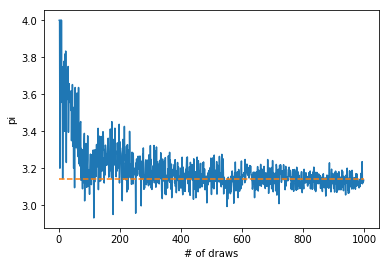

In [10]:
def g(x,y):
    if x**2 + y**2 <= 1:  
        g_eval1 = 1
    else:
        g_eval1 = 0
    return g_eval1


def int(g, N):    
    g_eval = 0
    x = np.random.uniform(-1,1,N)
    y = np.random.uniform(-1,1,N)
    np.random.seed(25)
    for i in range(N):
        g_eval = g_eval + g(x[i], y[i])
    int = (4/N)*g_eval
    return int

N_limit = 1000
pi_est = np.zeros(N_limit-3)

for jj in range(2,N_limit):
    pi_est[jj-3] = int(g, jj)

range_ = list(range(2,N_limit-1))
true_pi = np.pi*np.ones(N_limit-3)

plt.figure()
plt.plot(range_,pi_est)
plt.plot(range_,true_pi,'--')
plt.xlabel('# of draws')
plt.ylabel('pi')
plt.show()        
